In [25]:
import pandas as pd
import numpy as np
from numpy import array
import seaborn as sns
from sklearn.preprocessing import Imputer,LabelEncoder
from scipy.stats import norm,skew
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### Define the following functions as per the description, so that they can be called later to perform the tasks.

In [26]:
# to treat missing values

def treat_null_values(df, method):
    """Treats the missing values in the dataframe.
    
    This function accepts a dataframe and the method to treat the missing value.
    Depending on the method passed, impute/drop the missing values.
        
    Keyword arguments:
    df -- pandas dataframe for which we want to treat the missing values
    method -- method to treat the missing values
    """
    
    if method == 'drop':
        df.dropna(inplace = True)
    elif method == 'mean':
        df.fillna(round(df.mean(),1), inplace = True)
    elif method == 'median':
        df.fillna(df.median(), inplace = True)
    elif method == 'mode':
        df.fillna(df.mode()[0], inplace = True)
    else:
        df.fillna('NA', inplace = True)


In [27]:

# to seperate the numerical and categorical columns

def num_and_cat_columns(df):
    """Return seperate list of numerical & categorical columns.
    
    This function accepts a dataframe and returns two lists,
    one containing the names of numerical columns(num_cols) and the other categorical columns(cat_cols).
        
    Keyword arguments:
    df -- pandas dataframe for which we want the list of columns
    
    Returns:
    num_cols -- list of numerical columns
    cat_cols -- list of categorical columns
    """
    
    
    cols = df.columns
    num_cols = df._get_numeric_data().columns
    cat_cols = list(set(cols) - set(num_cols))
    
    return num_cols, cat_cols


In [28]:
# to encode the categorical column so as to convert them to numeric.
    
def encode_category(df, enc, col, method):
    """Encodes the categorical columns of the dataframe.
    
    This function accepts a dataframe and columns to be encoded along with the method to be used for encoding.
        
    Keyword arguments:
    df -- pandas dataframe for which we want to encode the columns -- this dataframe would be transformed
    enc -- the encoder - fitted on the train data
    col -- list of columns that is to be encoded
    method -- method to be used while encoding
    
    Returns:
    df1 -- the encoded dataframe
    """
    
    if method == 'label':
        # lb = LabelEncoder()
        # lb.fit(df[col])
        df[col] = enc.transform(df[col].astype(str))
    
    elif method == 'onehot':
        # ohe = OneHotEncoder(handle_unknown='ignore')
        # ohe.fit(df[[col]])
        tempdf = enc.transform(df[[col]]).toarray()
        newdf = pd.DataFrame(tempdf, columns = np.array(ohe.categories_).ravel())
        df = pd.concat([df, newdf], axis=1)
        df.drop(columns=[col], inplace = True)
        
    return df


In [29]:
# to clean the dollar sign from the currency column & convert it to float.
    
def clean_dollar(df, col):
    """Removes "$" sign from a column & converts it to float.
    
    This function accepts a dataframe and columns with $ sign to be converted to float.
        
    Keyword arguments:
    df -- pandas dataframe for which we want to encode the columns
    col -- list of columns that is to be converted
    
    Returns:
    df -- the converted dataframe
    """
    
    df[col] = df[col].apply(lambda s: s.strip('$')).astype(float)
    
    return df



In [30]:
# to visualize distributions of the column(s) by plotting them.
    
def plot_distribution(kind_, df, *col):
    """Plot distribution of the column(s).
    
    This function will plot a chart of the passed column as the 'kind' specified in kind_.
    You can pass multiple columns to this function.
        
    Keyword arguments:
    knid_ -- 'kind' of chart that will be plotted
    df -- pandas dataframe which has the data
    *col -- list of all the features for which we want to plot the distribution
    """
    
    if kind_ == 'box':
        
        if len(col) == 1:
            boxplot = df.boxplot(column = col[0], rot = 90)
            plt.show()
        
        elif len(col) > 1:
            for c in col[1:]:
                boxplot = df.boxplot(column = col[0], by = c, rot = 90)
            plt.show()
        
    else:
        if len(col) == 0:
            df.plot(kind = kind_)
            plt.show()
        
        elif len(col) == 1:
            df[col[0]].plot(kind = kind_)
            plt.xlabel(col[0])
            plt.show()
        
        elif len(col) == 2:
            df.plot(x = col[0], y = col[1], kind = kind_)
            plt.xlabel(col[0])
            plt.ylabel(col[1])
            plt.show()
        
        else:
            print("Unable to plot a chart with given parameters.")
        


In [31]:
# to apply transformation to any column

def transform_column(df, col, transformation):
    """Apply transformation to the column(s).
    
    This function will apply the passed transformation to the given dataframe & columns.
    You can pass multiple columns to this function.
        
    Keyword arguments:
    df -- pandas dataframe which has the data
    col -- list of all the features for which we want to apply the transformation
    transformation -- the transformation we want to apply
    """
    
    
    if transformation == 'log':
        df = np.log(df)
        
    elif transformation == 'square':
        df = np.square(df)
        
    elif transformation == 'sqrt':
        df = np.sqrt(df)




In [32]:
# to check outliers using box plot

def check_outliers(df, col, cat):
    """Check outliers through boxplot.
    
    This function plots and displays the boxplot of the feature col vs all the categories defined. 
    Check for any outlier present.
        
    Keyword arguments:
    df -- pandas dataframe which has the data
    col -- the feature for which we want to plot the boxplot
    cat -- the list of features (categorical) by which we want to check the outliers (for each category in each feature)
    """
    
    if len(cat) == 0:
        boxplot = df.boxplot(column=[col], rot = 90)
    else:
        for c in cat:
            boxplot = df.boxplot(column=[col], by=[c], rot = 90)
        



In [33]:
# to fit the model & return the score

def fit_model(X_train, X_test, y_train, y_test, model):
    """Fit the model & return the score of the fitted model.
    
    This function accepts the test & train data and fits the given model to it and returns the score of the model.
    
    Keyword arguments:
    X_train -- Train feature
    X_test -- Test/Validation feature
    y_train -- Train target
    y_test -- Tets/Validation target
    model -- the model to be fitted
    
    Returns:
    r2 -- R-Square of the fitted model    
    """
        
    if model == 'LinearRegression':
        
        regressor=LinearRegression()
        regressor.fit(X_train,y_train)
        y_pred =regressor.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        
    elif model == 'Lasso':
        
        lasso = Lasso()
        lasso.fit(X_train, y_train)
        lasso_pred = lasso.predict(X_test)
        r2 = r2_score(y_test, lasso_pred)

    elif model == 'Ridge':
        
        ridge = Ridge()
        ridge.fit(X_train, y_train)
        ridge_pred = ridge.predict(X_test)
        r2 = r2_score(y_test, ridge_pred)
        
    
    else:
        model = make_pipeline(PolynomialFeatures(2), LinearRegression())
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2= r2_score(y_test,y_pred)


    return r2



### Read the dataset. Take a look at the dataset. 

* Check the data types present in the dataframe.
* Call the num_and_cat_columns() with train as the parameter and store the results.
* Are there any missing values? Are there any Outliers? How do you want to treat them?


   Id Year Type  Year                       Organization Group  \
0   0  Calendar  2018                         Community Health   
1   1  Calendar  2014  Public Works, Transportation & Commerce   
2   2    Fiscal  2018            General City Responsibilities   
3   3    Fiscal  2015                         Community Health   
4   4    Fiscal  2014                         Community Health   

                      Department                             Union  \
0                            NaN         Prof & Tech Eng, Local 21   
1  MTA Municipal Transprtn Agncy  SEIU - Miscellaneous, Local 1021   
2                            NaN            SEIU, Local 1021, Misc   
3              DPH Public Health  SEIU - Miscellaneous, Local 1021   
4              DPH Public Health  SEIU - Miscellaneous, Local 1021   

                      Job Family                            Job  \
0            Information Systems  IS Business Analyst-Principal   
1            Public Service Aide     Publ Svc Ai

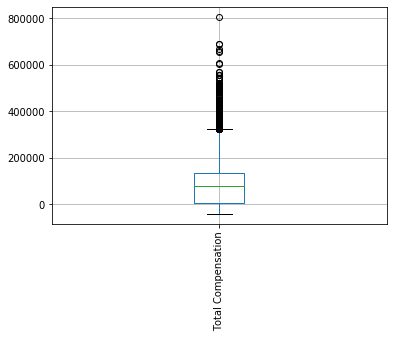

In [36]:
train = pd.read_csv("G:\\Data Science ML AI\\Python files\\Projects\\Project_Regularization_EDA_Employee_Compensation_Analysis\\train.csv")
print(train.head())

#Split the data into X and Y
X = train.drop(columns = ['Total Compensation'])
y = train[['Total Compensation']]

print(X.head())
print(y.head())


a, b = num_and_cat_columns(X)
print(a,len(a))
print(b, len(b))



print(X.isnull().sum())
check_outliers(y, 'Total Compensation', [])


X.drop(columns = ['Department'], inplace = True)


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data and apply some data preprocessing techniques

In [ ]:
# Have a look at the features, check the type where any currency is involved. 
# We have columns with compensations stored in form of strings. We need to clean it and convert this to numeric. 
# Call the clean_dollar() to do the same. Apply it to all train, val & test data.


for c in ['Retirement', 'Health and Dental', 'Other Benefits']:
    X = clean_dollar(X, c)
    # X_test = clean_dollar(X_test, c)




In [ ]:
# Check the distribution of certain columns you might find of interest. 
# This can be done by calling the plot_distribution(). 
# Apply some good transformation if required. Call transform_column() to do the same.

plot_distribution('hist', X, 'Retirement')
plot_distribution('hist', X, 'Health and Dental')
plot_distribution('hist', X, 'Other Benefits')


In [ ]:
# Treat the null values by calling the treat_null_values()

treat_null_values(X['Union'], 'mode')
treat_null_values(X['Job'], 'mode')


In [ ]:
# Before we proceed with the model fitting, we need to get rid of the categorical columns.
# We can use One Hot Encoding or Label Encoding to convert the categorical columns to numeric.
# Call the encode_category() with the list of columns and the method of encoding to do the same.

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2)
X_train_ = X_train.copy()  # Create a copy of the train data to train the encoder


for col in ['Union', 'Job Family', 'Job', 'Year Type', 'Organization Group']:
    lb = LabelEncoder()
    lb.fit(X_train_[col]) 
    X_test = encode_category(X_test, lb, col, 'label')
    X_train = encode_category(X_train, lb, col, 'label')
    

In [ ]:
# Now since we have encoded all the categorical columns, there shouldn't be any left in the data.
# Check the same by calling num_and_cat_columns()


a, b = num_and_cat_columns(X_train)
print("Numerical Columns:", a,len(a))
print("Categorical Columns:", b, len(b))



### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Total Compensation`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score.



In [ ]:
# Now let's come to the actual task, using linear regression to predict the Total Compensation. 
# We will check the model accuracy using `r^2 score`
# Call the fit_model() with respective parameters.

r2 = fit_model(X_train, X_test, y_train, y_test, 'LinearRegression')
print ("Linear Regression: ", r2)


# # Check if the accuracy increases after using the Lasso Regularization technique.
# # Call the fit_model() with respective parameters.
r2 = fit_model(X_train, X_test, y_train, y_test, 'Lasso')
print ("Lasso: ", r2)


# # Check if the accuracy increases after using the Ridge Regularization technique.
# # Call the fit_model() with respective parameters.

r2 = fit_model(X_train, X_test, y_train, y_test, 'Ridge')
print ("Ridge: ", r2)



# Check if the accuracy increases after using the Polypipeline technique.
r2 = fit_model(X_train, X_test, y_train, y_test, 'Pipeline')
print ("Pipeline: ", r2)

# Which technique was the best? That is your final model.


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [ ]:
# Code Starts here
# Prediction on test data

# Read the test data
test = pd.read_csv('..//Data//test.csv')

# Storing the id from the test file
id_ = test['Id']

# Dropping the same columns from the test data and applying same transformation
test.drop(columns = ['Department'], inplace = True)
treat_null_values(test['Union'], 'mode')
treat_null_values(test['Job'], 'mode')

for c in ['Retirement', 'Health and Dental', 'Other Benefits']:
    test = clean_dollar(test, c)
    
for col in ['Union', 'Job Family', 'Job', 'Year Type', 'Organization Group']:
    lb = LabelEncoder()
    lb.fit(X_train_[col])
    test = encode_category(test, lb, col, 'label')
    
   
# Applying pipeline on test data
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_train, y_train)


# Predict on the test data
y_pred_test = model.predict(test)
y_pred_test = y_pred_test.flatten()

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'Total Compensation':y_pred_test})

# Convert the sample submission file into a csv file
sample_submission.to_csv('sample_submission_test.csv',index=False)

# Code ends here